# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  
1. [Откройте файл с данными и изучите общую информацию](#start)
2. [Предобработка данных](#preprocessing)
3. [Посчитайте и добавьте в таблицу](#addition)
4. [Проведите исследовательский анализ данных и выполните инструкции](#analysis)
5. [Общий вывод](#output)

<a id="start"></a>
### Откройте файл с данными и изучите общую информацию. 

In [9]:
import pandas as pd
import matplotlib
import pylab
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [10]:
df = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


#### Вывод
> Датафрейм состоит из **23699** строк и **22** столбцов, имеются пропущенные значения в столбцах *ceiling_height, floors_total, living_area, floor, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.*  
Для корректного отображения названия столбцов необходимо поменять названия столбцов *cityCenters_nearest, parks_around3000, ponds_around3000.*  
В описательной информации по датафрейму не отображена информация по столбцам *parks_nearest, ponds_around3000.*  
Данные с датами имеют неправильный формат

<a id="preprocessing"></a>
### Предобработка данных

In [13]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
df["ceiling_height"] = df["ceiling_height"].fillna(2.70)

df["floors_total"] = df["floors_total"].fillna(df["floors_total"].median())

rooms_group = df.groupby("rooms")["living_area"].mean().round()
for i in rooms_group.index:
    df.loc[(df['rooms'] == i) & (df['living_area'].isnull()), 'living_area'] = rooms_group[i]
    
df["is_apartment"] = df["is_apartment"].fillna(value=" ")

df["kitchen_area"] = df["kitchen_area"].fillna(df["kitchen_area"].mean().round(1))

df["balcony"] = df["balcony"].fillna(0)

df["days_exposition"] = df["days_exposition"].fillna(0)

df["cityCenters_nearest"] = df["cityCenters_nearest"].fillna(0)

df= df.dropna(subset=["locality_name"])

In [15]:
df = df.fillna(value=" ")
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,,...,25.0,0.0,Санкт-Петербург,18863,16028.0,1,482,2,755,0.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.70,11.0,18.6,1,,...,11.0,2.0,посёлок Шушары,12817,18603.0,0,,0,,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,,...,8.3,0.0,Санкт-Петербург,21741,13933.0,1,90,2,574,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,47.0,9,,...,10.6,0.0,Санкт-Петербург,28098,6800.0,2,84,3,234,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,,...,41.0,0.0,Санкт-Петербург,31856,8098.0,2,112,1,48,121.0


In [16]:
df["first_day_exposition"] = pd.to_datetime(df["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S")
df["last_price"] = df["last_price"].astype("int")
df["floors_total"] = df["floors_total"].astype("int")
df["days_exposition"] = df["days_exposition"].astype("int")
df["is_apartment"] = df["is_apartment"].astype("bool")
df["locality_name"] = df["locality_name"].astype("str")

In [17]:
df.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition', \
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', \
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', \
       'locality_name', 'airports_nearest', 'city_centers_nearest', \
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000', \
       'ponds_nearest', 'days_exposition']

In [18]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,25.0,0.0,Санкт-Петербург,18863,16028.0,1,482,2,755,0
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,True,...,11.0,2.0,посёлок Шушары,12817,18603.0,0,,0,,81
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741,13933.0,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.70,14,47.0,9,True,...,10.6,0.0,Санкт-Петербург,28098,6800.0,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,41.0,0.0,Санкт-Петербург,31856,8098.0,2,112,1,48,121


#### Вывод
> ДФ имеет данные с пропусками, они все изучены и заполнены в соответствии от информации находящийся в столбцах ДФ. Столбцы с датами и целыми числами имеют неправильный формат.
> Все данные приведены в соответствии и с ними можно работать

<a id="addition"></a>
### Посчитайте и добавьте в таблицу

In [19]:
df["price_meter"] = (df["last_price"] / df["total_area"]).round()
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,0.0,Санкт-Петербург,18863,16028.0,1,482,2,755,0,120370.0
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,True,...,2.0,посёлок Шушары,12817,18603.0,0,,0,,81,82921.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,True,...,0.0,Санкт-Петербург,21741,13933.0,1,90,2,574,558,92786.0
3,0,64900000,159.0,2015-07-24,3,2.70,14,47.0,9,True,...,0.0,Санкт-Петербург,28098,6800.0,2,84,3,234,424,408176.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,0.0,Санкт-Петербург,31856,8098.0,2,112,1,48,121,100000.0


In [20]:
df["day_exposition"] = df["first_day_exposition"].dt.day_name()
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,day_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,Санкт-Петербург,18863,16028.0,1,482,2,755,0,120370.0,Thursday
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,True,...,посёлок Шушары,12817,18603.0,0,,0,,81,82921.0,Tuesday
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,True,...,Санкт-Петербург,21741,13933.0,1,90,2,574,558,92786.0,Thursday
3,0,64900000,159.0,2015-07-24,3,2.70,14,47.0,9,True,...,Санкт-Петербург,28098,6800.0,2,84,3,234,424,408176.0,Friday
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,Санкт-Петербург,31856,8098.0,2,112,1,48,121,100000.0,Tuesday


In [21]:
df["month_exposition"] = df["first_day_exposition"].dt.month_name()
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,day_exposition,month_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,18863,16028.0,1,482,2,755,0,120370.0,Thursday,March
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,True,...,12817,18603.0,0,,0,,81,82921.0,Tuesday,December
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,True,...,21741,13933.0,1,90,2,574,558,92786.0,Thursday,August
3,0,64900000,159.0,2015-07-24,3,2.70,14,47.0,9,True,...,28098,6800.0,2,84,3,234,424,408176.0,Friday,July
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,31856,8098.0,2,112,1,48,121,100000.0,Tuesday,June


In [22]:
df["year_exposition"] = df["first_day_exposition"].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,day_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,16028.0,1,482,2,755,0,120370.0,Thursday,March,2019
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,True,...,18603.0,0,,0,,81,82921.0,Tuesday,December,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,True,...,13933.0,1,90,2,574,558,92786.0,Thursday,August,2015
3,0,64900000,159.0,2015-07-24,3,2.70,14,47.0,9,True,...,6800.0,2,84,3,234,424,408176.0,Friday,July,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,8098.0,2,112,1,48,121,100000.0,Tuesday,June,2018


In [23]:
def func_floor(row):
    floor = row["floor"]
    flor_1 = row["floors_total"]
    if floor == 1:
        return "первый"
    if floor == flor_1:
        return "последний"
    
    return "другой"

In [24]:
df["floor_house"] = df.apply(func_floor, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,day_exposition,month_exposition,year_exposition,floor_house
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,1,482,2,755,0,120370.0,Thursday,March,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,True,...,0,,0,,81,82921.0,Tuesday,December,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,True,...,1,90,2,574,558,92786.0,Thursday,August,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.70,14,47.0,9,True,...,2,84,3,234,424,408176.0,Friday,July,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,2,112,1,48,121,100000.0,Tuesday,June,2018,другой


In [25]:
df["share_living_space"] = df["living_area"] / df["total_area"]
df["share_kitchen"] = df["kitchen_area"] / df["total_area"]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_meter,day_exposition,month_exposition,year_exposition,floor_house,share_living_space,share_kitchen
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2,755,0,120370.0,Thursday,March,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,True,...,0,,81,82921.0,Tuesday,December,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,True,...,2,574,558,92786.0,Thursday,August,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.70,14,47.0,9,True,...,3,234,424,408176.0,Friday,July,2015,другой,0.295597,0.066667
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1,48,121,100000.0,Tuesday,June,2018,другой,0.320000,0.410000


#### Вывод
> Данные необходимые дня анализа добавлены в таблицу и проведенно категорирование данных столбла **floor**

<a id="analysis"></a>
### Проведите исследовательский анализ данных и выполните инструкции:

Text(0.5, 1.0, 'Площадь продаваемых квартир')

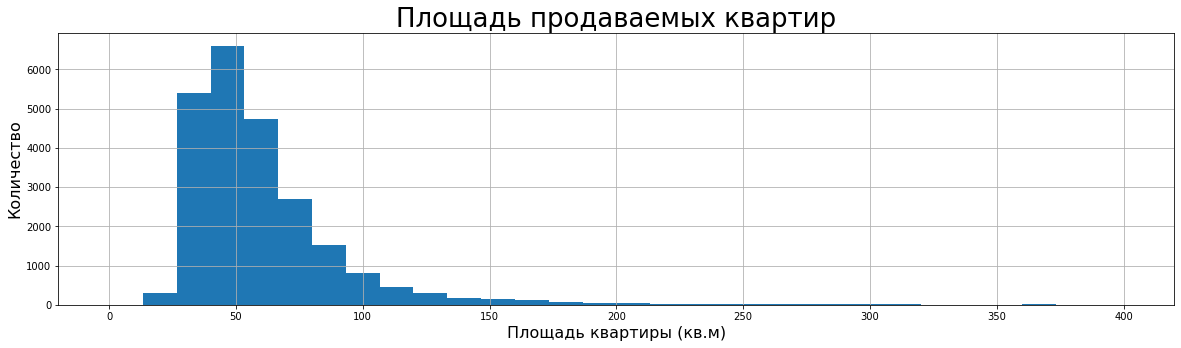

In [26]:
df.hist(column="total_area", bins=30, range=(0, 400), figsize=(20, 5), sharey=True)
plt.xlabel("Площадь квартиры (кв.м)", fontsize=16)
plt.ylabel("Количество", fontsize=16)
plt.title("Площадь продаваемых квартир", fontsize=26)

In [27]:
df["total_area"].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Text(0.5, 1.0, 'Цены продаваемых квартир')

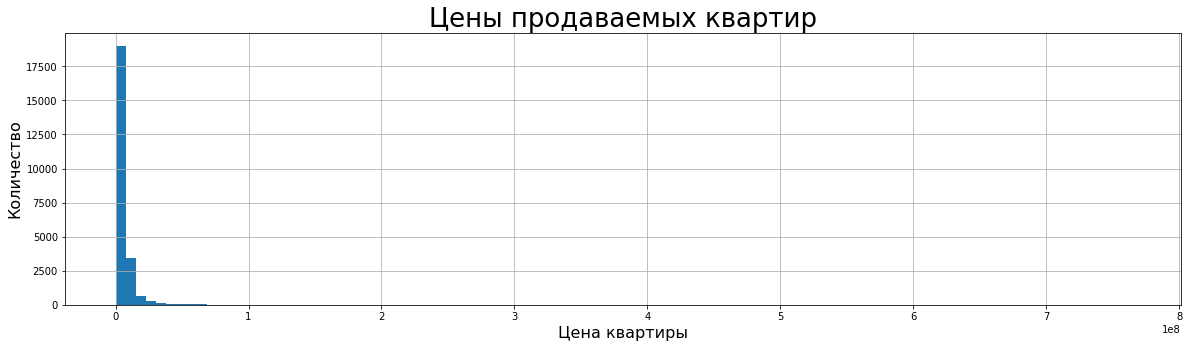

In [28]:
df.hist(column="last_price", bins=100, figsize=(20, 5))
plt.xlabel("Цена квартиры", fontsize=16)
plt.ylabel("Количество", fontsize=16)
plt.title("Цены продаваемых квартир", fontsize=26)

Text(0.5, 1.0, 'Цены продаваемых квартир')

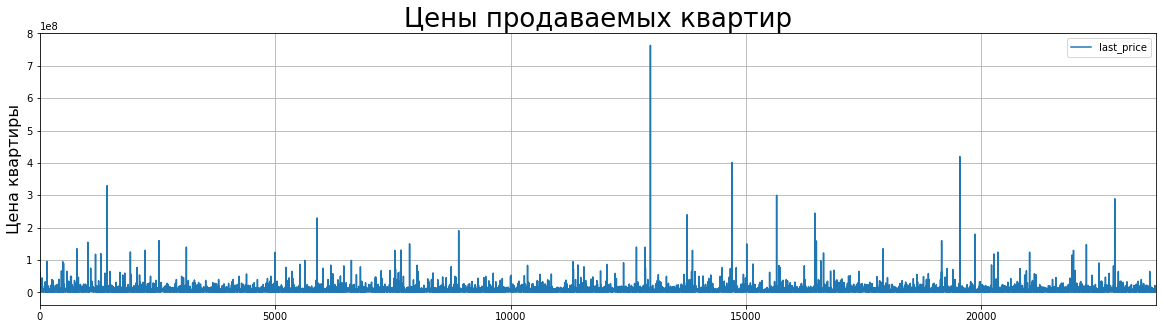

In [29]:
df.plot(y="last_price", figsize=(20, 5), grid=True)

plt.ylabel("Цена квартиры", fontsize=16)
plt.title("Цены продаваемых квартир", fontsize=26)

In [30]:
df["last_price"].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Text(0.5, 1.0, 'Количество комнат в продаваемых квартирах')

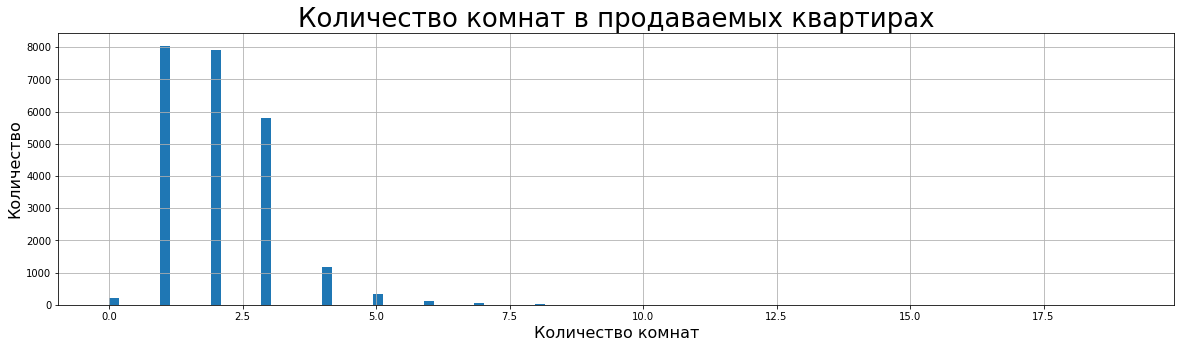

In [31]:
df.hist(column="rooms", bins=100, figsize=(20, 5))
plt.xlabel("Количество комнат", fontsize=16)
plt.ylabel("Количество", fontsize=16)
plt.title("Количество комнат в продаваемых квартирах", fontsize=26)

Text(0.5, 1.0, 'Количество комнат в продаваемых квартирах')

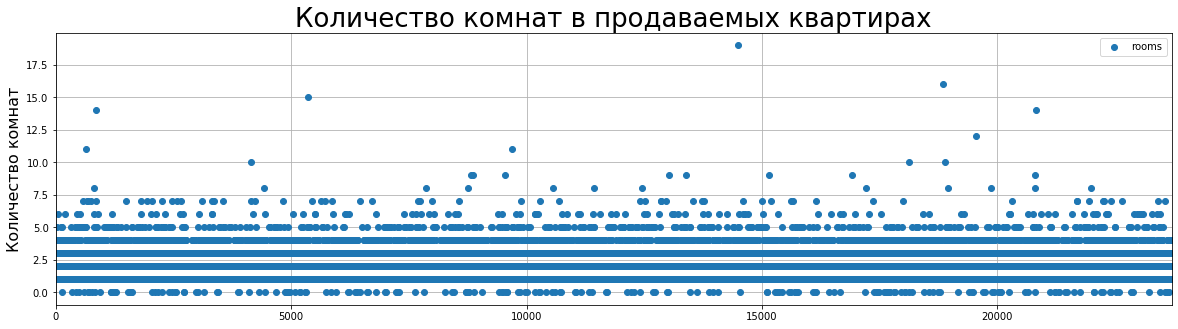

In [32]:
df.plot(y="rooms", style="o", figsize=(20, 5), grid=True)
plt.ylabel("Количество комнат", fontsize=16)
plt.title("Количество комнат в продаваемых квартирах", fontsize=26)

In [33]:
df[df.rooms == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_meter,day_exposition,month_exposition,year_exposition,floor_house,share_living_space,share_kitchen
144,1,2450000,27.00,2017-03-30,0,2.7,24,15.50,2,True,...,,,181,90741.0,Thursday,March,2017,другой,0.574074,0.392593
349,4,2320000,25.00,2017-09-27,0,2.7,14,17.00,1,True,...,,,45,92800.0,Wednesday,September,2017,первый,0.680000,0.424000
440,8,2480000,27.11,2018-03-12,0,2.7,17,24.75,4,True,...,2,982,64,91479.0,Monday,March,2018,другой,0.912947,0.391000
508,0,3375000,34.40,2017-03-28,0,2.7,26,24.30,19,True,...,1,593,430,98110.0,Tuesday,March,2017,другой,0.706395,0.308140
608,2,1850000,25.00,2019-02-20,0,2.7,10,19.00,7,True,...,,,29,74000.0,Wednesday,February,2019,другой,0.760000,0.424000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.7,25,18.00,16,True,...,1,623,14,123077.0,Friday,September,2017,другой,0.692308,0.407692
23442,0,2500000,27.70,2017-09-28,0,2.7,24,18.00,4,True,...,,,4,90253.0,Thursday,September,2017,другой,0.649819,0.382671
23554,15,3350000,26.00,2018-09-07,0,2.7,19,19.00,8,True,...,2,112,31,128846.0,Friday,September,2018,другой,0.730769,0.407692
23592,10,1450000,29.00,2017-11-11,0,2.7,9,18.00,8,True,...,,,82,50000.0,Saturday,November,2017,другой,0.620690,0.365517


In [34]:
df["rooms"].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0.5, 1.0, 'Высота потолков в продаваемых квартирах')

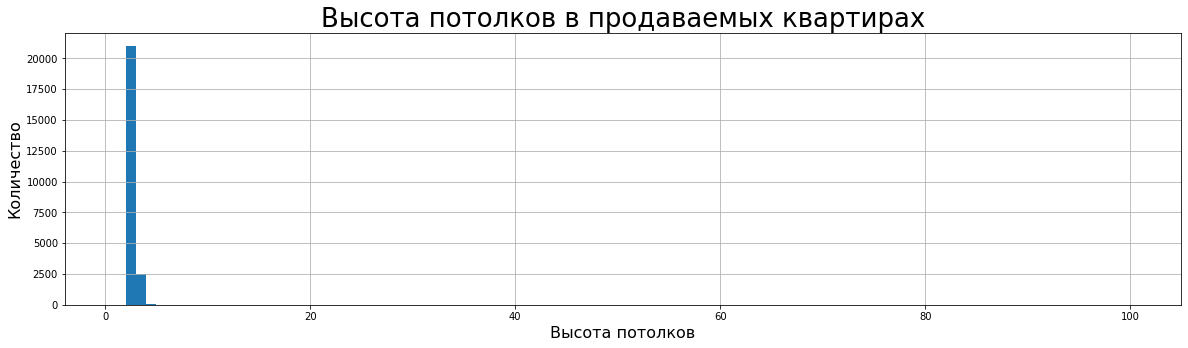

In [35]:
df.hist(column="ceiling_height", bins=100, figsize=(20, 5))
plt.xlabel("Высота потолков", fontsize=16)
plt.ylabel("Количество", fontsize=16)
plt.title("Высота потолков в продаваемых квартирах", fontsize=26)

Text(0.5, 1.0, 'Высота потолков в продаваемых квартирах')

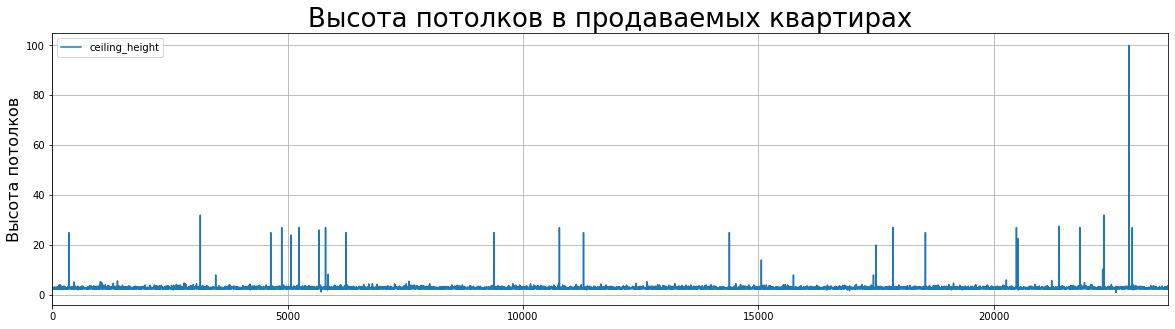

In [36]:
df.plot(y="ceiling_height", figsize=(20, 5), title="Высота потолков", grid=True)
plt.ylabel("Высота потолков", fontsize=16)
plt.title("Высота потолков в продаваемых квартирах", fontsize=26)

In [37]:
df["ceiling_height"].describe()

count    23650.000000
mean         2.743677
std          0.988099
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [38]:
df[df.ceiling_height == 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_meter,day_exposition,month_exposition,year_exposition,floor_house,share_living_space,share_kitchen
22869,0,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,3,30,19,600000.0,Wednesday,July,2018,последний,0.56,0.44


In [39]:
df[df["days_exposition"] > 0]["days_exposition"].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'Сколько дней было размещено объявление о продажи квартир')

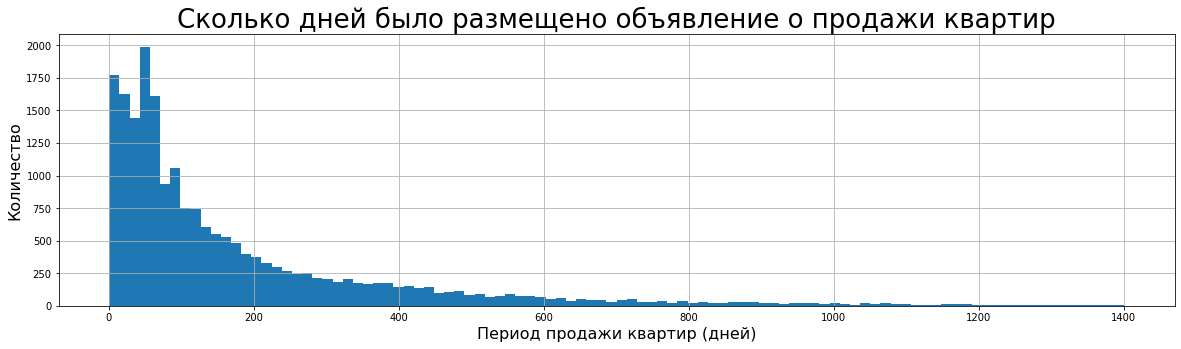

In [40]:
df.hist(column="days_exposition", bins=100, range=(1, 1400), figsize=(20, 5))
plt.xlabel("Период продажи квартир (дней)", fontsize=16)
plt.ylabel("Количество", fontsize=16)
plt.title("Сколько дней было размещено объявление о продажи квартир", fontsize=26)

In [41]:
df = df[(df.days_exposition > 0) & (df.ceiling_height < 100)]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_meter,day_exposition,month_exposition,year_exposition,floor_house,share_living_space,share_kitchen
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,True,...,0,,81,82921.0,Tuesday,December,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,True,...,2,574,558,92786.0,Thursday,August,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.70,14,47.0,9,True,...,3,234,424,408176.0,Friday,July,2015,другой,0.295597,0.066667
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1,48,121,100000.0,Tuesday,June,2018,другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,2.70,12,14.4,5,True,...,,,55,95066.0,Monday,September,2018,другой,0.473684,0.299342


In [42]:
total_area_price = df.pivot_table(index='total_area', values='last_price', aggfunc=("count", "median"))\
                    .sort_values(by='total_area')
total_area_price

,count,median
total_area,,
12.0,1.0,2400000.0
13.0,3.0,1850000.0
13.2,1.0,1686000.0
14.0,1.0,1190000.0
15.0,2.0,1725000.0
...,...,...
500.0,2.0,190000000.0
507.0,1.0,84000000.0
590.0,1.0,65000000.0


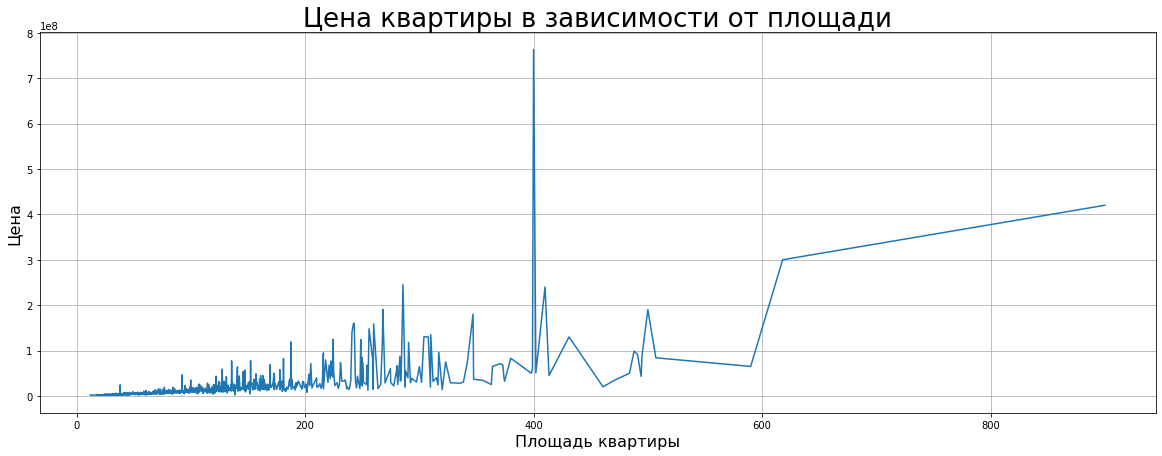

In [43]:
plt.figure(figsize=(20, 7))
plt.plot(total_area_price.index.values, total_area_price["median"].values)
plt.title("Цена квартиры в зависимости от площади", fontsize=26)
plt.xlabel("Площадь квартиры", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [44]:
rooms_price = df.pivot_table(index='rooms', values='last_price', aggfunc=("count", "median")).sort_values(by='median')
rooms_price

,count,median
rooms,,
0,183,2700000
1,7261,3570000
2,6897,4700000
3,4803,6050000
4,936,8810000
5,252,13300000
6,76,19000000
8,11,24000000
9,4,24250000


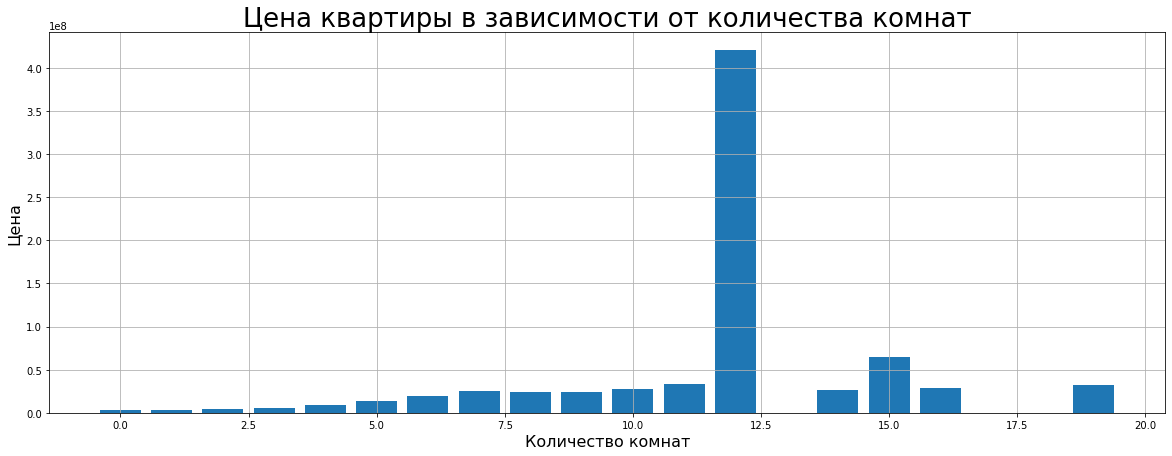

In [45]:
plt.figure(figsize=(20, 7))
plt.bar(rooms_price.index.values, rooms_price["median"].values)
plt.title("Цена квартиры в зависимости от количества комнат", fontsize=26)
plt.xlabel("Количество комнат", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [46]:
floor_price = df.pivot_table(index='floor_house', values='last_price', aggfunc=("count", "median")).sort_values(by='median')
floor_price

,count,median
floor_house,,
первый,2465,3800000
последний,2816,4250000
другой,15188,4700000


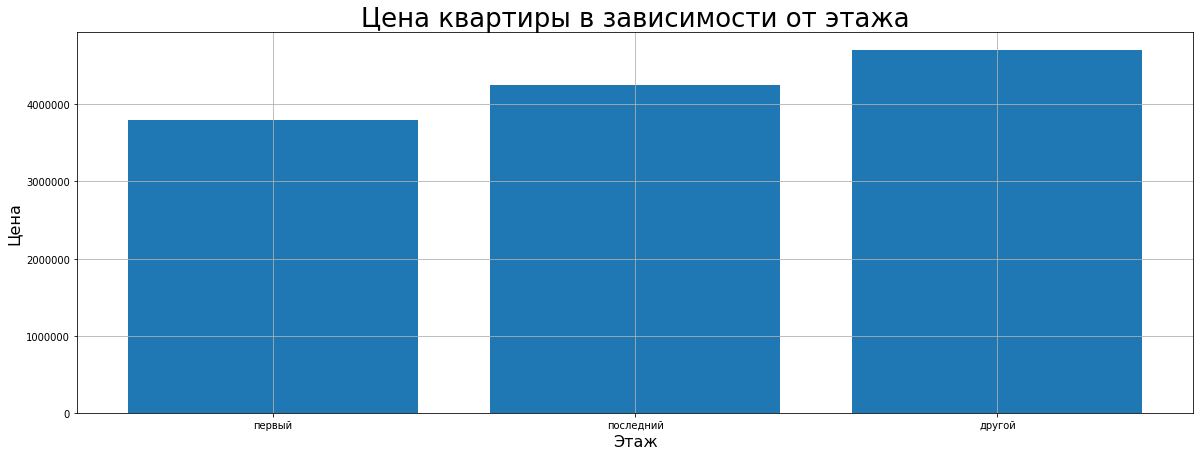

In [47]:
plt.figure(figsize=(20, 7))
plt.bar(floor_price.index.values, floor_price["median"].values)
plt.title("Цена квартиры в зависимости от этажа", fontsize=26)
plt.xlabel("Этаж", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [48]:
city_centers_price = df.pivot_table(index='city_centers_nearest', values='last_price', aggfunc=("count", "median"))\
.sort_values(by='city_centers_nearest')
city_centers_price

,count,median
city_centers_nearest,,
0.0,4646.0,2800000.0
208.0,1.0,5800000.0
215.0,1.0,10990000.0
287.0,1.0,9590000.0
318.0,4.0,40651314.0
...,...,...
62454.0,1.0,3200000.0
62706.0,1.0,3600000.0
64857.0,1.0,3650000.0


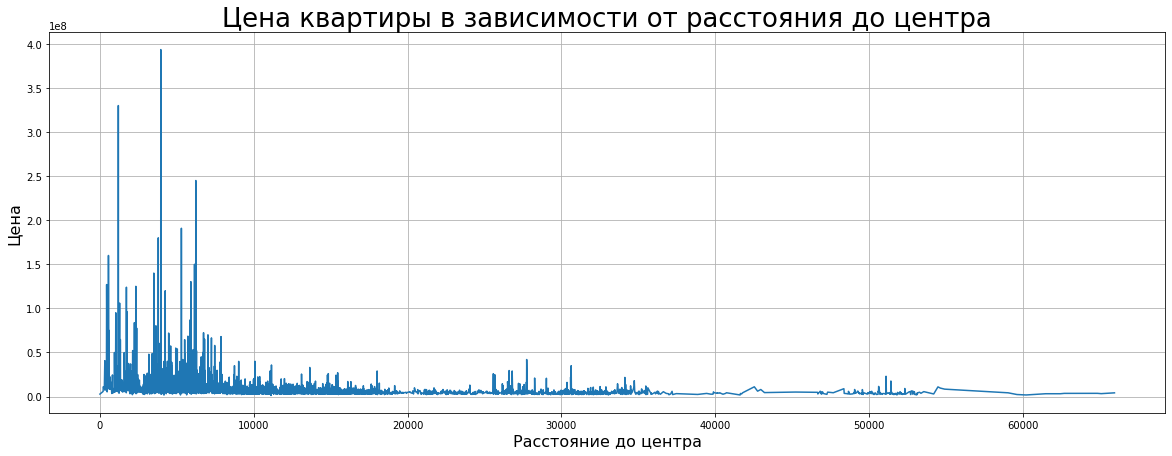

In [49]:
plt.figure(figsize=(20, 7))
plt.plot(city_centers_price.index.values, city_centers_price["median"].values)
plt.title("Цена квартиры в зависимости от расстояния до центра", fontsize=26)
plt.xlabel("Расстояние до центра", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [50]:
day_price = df.pivot_table(index='day_exposition', values='last_price', aggfunc=("count", "median"))\
.sort_values(by='median')
day_price

,count,median
day_exposition,,
Sunday,1468,4450000
Friday,3519,4490000
Monday,3043,4500000
Saturday,1667,4500000
Wednesday,3404,4550000
Thursday,3761,4575000
Tuesday,3607,4600000


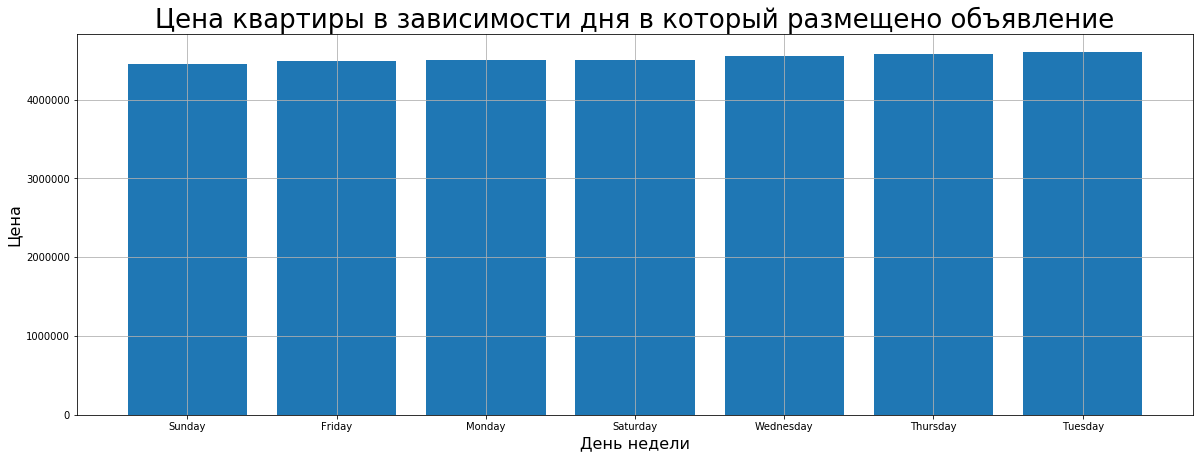

In [51]:
plt.figure(figsize=(20, 7))
plt.bar(day_price.index.values, day_price["median"].values)
plt.title("Цена квартиры в зависимости дня в который размещено объявление", fontsize=26)
plt.xlabel("День недели", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [52]:
month_price = df.pivot_table(index='month_exposition', values='last_price', aggfunc=("count", "median"))\
.sort_values(by='median')
month_price

,count,median
month_exposition,,
June,1677,4370000
August,1610,4500000
February,2280,4500000
January,1282,4500000
July,1573,4500000
March,1969,4500000
May,1155,4500000
October,1932,4500000
December,1471,4550000


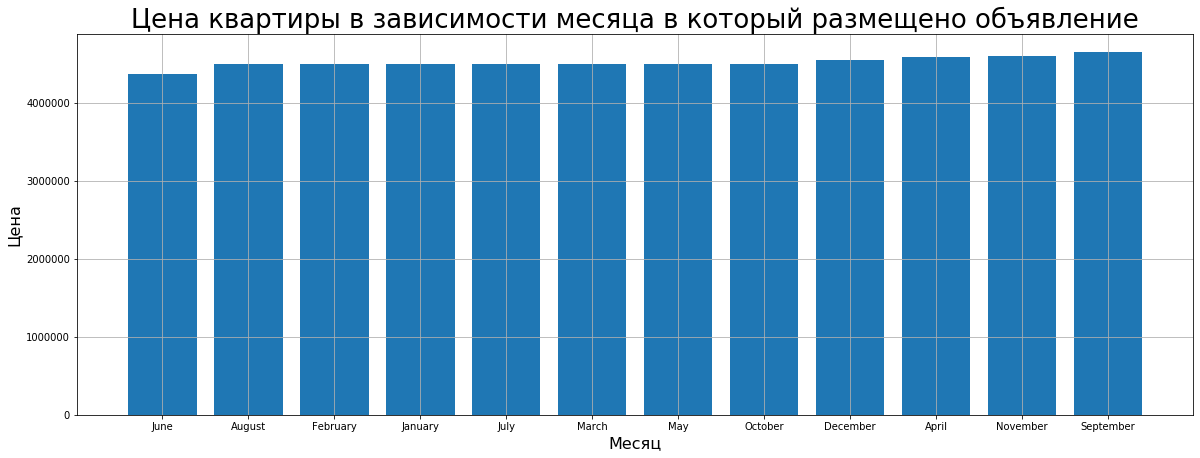

In [53]:
plt.figure(figsize=(20, 7))
plt.bar(month_price.index.values, month_price["median"].values)
plt.title("Цена квартиры в зависимости месяца в который размещено объявление", fontsize=26)
plt.xlabel("Месяц", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [54]:
year_price = df.pivot_table(index='year_exposition', values='last_price', aggfunc=("count", "median"))\
.sort_values(by='median', ascending=False)
year_price

,count,median
year_exposition,,
2014,118,7182500
2015,1103,5230000
2019,1083,4789500
2016,2698,4500000
2017,7914,4500000
2018,7553,4490000


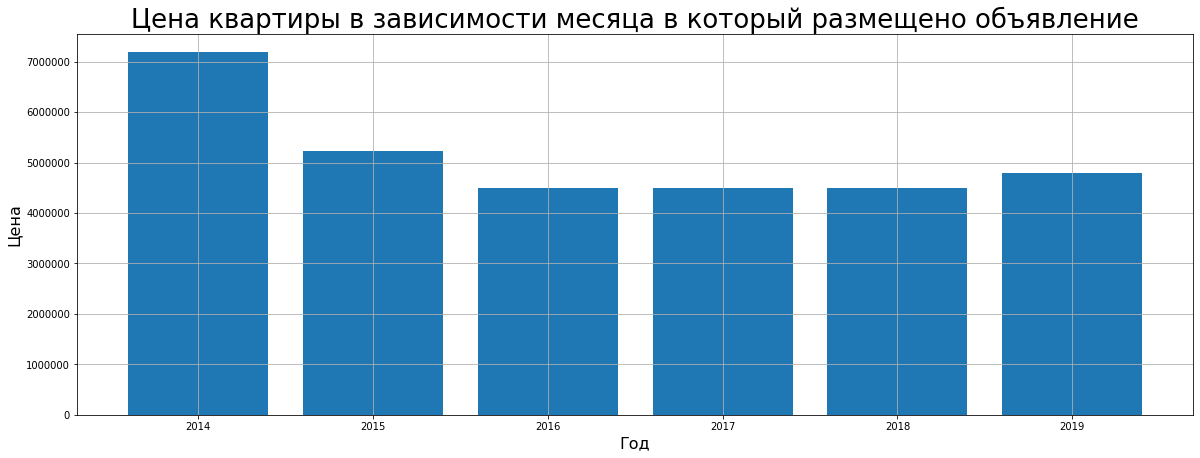

In [55]:
plt.figure(figsize=(20, 7))
plt.bar(year_price.index.values, year_price["median"].values)
plt.title("Цена квартиры в зависимости месяца в который размещено объявление", fontsize=26)
plt.xlabel("Год", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [56]:
big_city = df.pivot_table(index="locality_name", values="price_meter", aggfunc=("count", "mean"))\
           .sort_values(by="count", ascending=False).head(10)
big_city

,count,mean
locality_name,,
Санкт-Петербург,13637,112376.265674
посёлок Мурино,517,85818.377176
посёлок Шушары,408,78010.186275
Всеволожск,339,68570.622419
Колпино,308,74865.357143
Пушкин,307,102074.631922
посёлок Парголово,302,89505.023179
деревня Кудрово,299,92473.588629
Гатчина,268,67928.294776


In [57]:
df.pivot_table(index="locality_name", values="last_price", aggfunc=("sum"))\
           .sort_values(by="last_price", ascending=False)

,last_price
locality_name,
Санкт-Петербург,104399415450
Пушкин,1913244264
посёлок Мурино,1897769810
посёлок Шушары,1651056799
посёлок Парголово,1326823459
...,...
деревня Ялгино,777000
поселок городского типа Кондратьево,750000
поселок Тёсово-4,750000


In [58]:
piter = df[(df.locality_name == "Санкт-Петербург") & (df.city_centers_nearest > 0)]
piter["city_centers_nearest_km"] = (piter["city_centers_nearest"]/1000).round()
piter["mean_km"] = piter["last_price"] / piter["city_centers_nearest"]
piter

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_meter,day_exposition,month_exposition,year_exposition,floor_house,share_living_space,share_kitchen,city_centers_nearest_km,mean_km
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,True,...,558,92786.0,Thursday,August,2015,другой,0.612500,0.148214,14.0,372.927582
3,0,64900000,159.00,2015-07-24,3,2.70,14,47.0,9,True,...,424,408176.0,Friday,July,2015,другой,0.295597,0.066667,7.0,9544.117647
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,121,100000.0,Tuesday,June,2018,другой,0.320000,0.410000,8.0,1234.872808
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.6,7,True,...,289,88525.0,Sunday,February,2017,другой,0.714754,0.106557,15.0,359.808102
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.3,3,True,...,137,127525.0,Thursday,November,2017,другой,0.512626,0.214646,14.0,363.885286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.0,12,True,...,23,91089.0,Monday,April,2019,другой,0.623762,0.148515,14.0,637.649016
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,True,...,29,100567.0,Wednesday,February,2018,другой,0.461756,0.257790,16.0,220.757416
23690,3,5500000,52.00,2018-07-19,2,2.70,5,31.0,2,True,...,15,105769.0,Thursday,July,2018,другой,0.596154,0.115385,6.0,878.173399
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,True,...,519,129904.0,Thursday,October,2016,другой,0.552812,0.145405,4.0,2109.601247


In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(piter.city_centers_nearest_km.values, piter.mean_km.values)
plt.title("Цена квартиры в зависимости от расстояния до центра Санкт_Петербурга (км)")
plt.xlabel("Расстояние в км")
plt.ylabel("Цена")
plt.grid()
plt.show()

In [ ]:
piter_center = piter[(piter.city_centers_nearest_km >= 0) & (piter.city_centers_nearest_km <= 8)]
piter_center.head()

In [ ]:
piter_center[["total_area", "last_price", "rooms", "ceiling_height"]].describe()

In [ ]:
rooms_price_piter_center = piter_center.pivot_table(index='rooms', values='last_price', aggfunc="median")\
                            .sort_values(by='last_price')
rooms_price_piter_center

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(rooms_price_piter_center.index.values, rooms_price_piter_center.last_price.values)
plt.title("Цена квартиры в зависимости от количества комнат (центр)", fontsize=26)
plt.xlabel("Количество комнат", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(piter.rooms.values, piter.last_price.values)
plt.title("Цена квартиры в зависимости от количества комнат (полная статистика)", fontsize=26)
plt.xlabel("Количество комнат", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [ ]:
floor_price_piter_center = piter_center.pivot_table(index='floor_house', values='last_price', aggfunc="median") \
                    .sort_values(by='last_price')
floor_price_piter_center

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(floor_price_piter_center.index.values, floor_price_piter_center.last_price.values)
plt.title("Цена квартиры в зависимости от этажа (центр)", fontsize=26)
plt.xlabel("Этаж", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(piter.floor_house.values, piter.last_price.values)
plt.title("Цена квартиры в зависимости от этажа (полная статистика)", fontsize=26)
plt.xlabel("Этаж", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [ ]:
piter_city_centers_price = piter_center.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc="median")\
.sort_values(by='city_centers_nearest_km')
piter_city_centers_price

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(piter_city_centers_price.index.values, piter_city_centers_price.last_price.values)
plt.title("Цена квартиры в зависимости от расстояния до центра (центр)", fontsize=26)
plt.xlabel("Расстояние до центра", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(piter.city_centers_nearest_km.values, piter.last_price.values)
plt.title("Цена квартиры в зависимости от расстояния до центра (полная статистика)", fontsize=26)
plt.xlabel("Расстояние до центра", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [ ]:
piter_center_day_price = piter_center.pivot_table(index='day_exposition', values='last_price', aggfunc="median")\
                        .sort_values(by='last_price')
piter_center_day_price

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(piter_center_day_price.index.values, piter_center_day_price.last_price.values)
plt.title("Цена квартиры в зависимости дня в который размещено объявление (центр)", fontsize=26)
plt.xlabel("День недели", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(piter.day_exposition.values, piter.last_price.values)
plt.title("Цена квартиры в зависимости дня в который размещено объявление (полная статистика)", fontsize=26)
plt.xlabel("День недели", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [ ]:
piter_center_month_price = piter_center.pivot_table(index='month_exposition', values='last_price', aggfunc="median")\
                        .sort_values(by='last_price')
piter_center_month_price

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(piter_center_month_price.index.values, piter_center_month_price.last_price.values)
plt.title("Цена квартиры в зависимости от месяца в который размещено объявление (центр)", fontsize=26)
plt.xlabel("Месяц", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(piter.month_exposition.values, piter.last_price.values)
plt.title("Цена квартиры в зависимости от месяца в который размещено объявление (полная статистика)", fontsize=26)
plt.xlabel("Месяц", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [ ]:
piter_center_year_price = piter_center.pivot_table(index='year_exposition', values='last_price', aggfunc="median")\
                        .sort_values(by='last_price')
piter_center_year_price

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(piter_center_year_price.index.values, piter_center_year_price.last_price.values)
plt.title("Цена квартиры в зависимости от года в который размещено объявление (центр)", fontsize=26)
plt.xlabel("Год", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(piter.year_exposition.values, piter.last_price.values)
plt.title("Цена квартиры в зависимости от года в который размещено объявление (полная статистика)", fontsize=26)
plt.xlabel("Год", fontsize=16)
plt.ylabel("Цена", fontsize=16)
plt.grid()
plt.show()

<a id="output"></a>
### Общий вывод
> В результате анализа данных был получен датафрейм состоящий из 23699 строк и 22 стобцов со множеством пропущенных значений в разных столбцах и неопределенным форматом данных.   
Проведена обработка данных где пропущенные значения обработаны и заменены на значения соответствующие столбцу, заменен формат данных в столбцах соответствующий датам и целым числам.  
Для удобства анализа данных в ДФ добавлены столбца цены квадратного метра, день, месяц, год побликации объявления, этажность домов распределена по категориям: первый, другой, последний, соотношение жилой площади к общей и кухни к общей площади.  
В результате изучения площадей продаваемых квартир анализ показал что выставлено на продажу большое количество квартир с площадями от 40 до 50 кв.м, квартиры с площадью более 10 кв.м присутствуют но в небольшом количестве. Средняя площать продаваемых квартир равна 60 кв.м, а медианное значение равно 52 кв.м, самая маленькая квартира площадью 12 кв.м, а самая большая 900 кв.м.  
В результате изучения цены продаваемых квартир анализ показал что средняя цена продаваемых квартир находится на отметке 6.5 млн., а медианное значение на 4.65 млн. такая разница обусловленно дорогими квартирами (выбросами).  
В результате изучения числа комнат в продаваемых квартирах анализ показал что количество комнат в продаваемых квартирах находится на уровне от 1 до 5, есть выбросы в большую сторону и квартиры с 0 комнат - квартиры студии и апартаменты. В среднем в продаваемых квартирах 2 комнаты (равны с медианой), максимально 19 комнат.  
В результате изучения высоты потолков в продаваемых квартирах анализ показал что в среднем высота потолков в квартирах 2.7 м (медианв равна), минимальная высота 1 м, а максимальная 100 м., (наблюдается большой выброс, продаются аппартаменты площадью 25 кв.м с одной комнатой в 8 км от центра за 15 млн).  
В результате анализа времени продажи квартиры, отбросив 0 значения (выбросы) видим что большинство квартир продается до 200 дней, в среднем продажа квартир занимает до 100 дней, судя по гистограмме если квартира продалась до 20 дней это очень быстро, самая долгая продажа квартиры занимает до 3-х лет.  
В результате изучения факторов влияющих на стоимость квартиры мы убедились что на стоимость квартиры влияют такие факторы как площадь квартиры, расстояние до центра, количество комнат, этаж квартиры. Так же в результате изучения данных мы видим что самые дорогие квартиры в Санкт_Питербурге.  
При изучении квартир продаваемых в Санкт_Питербурге мы видим что самые дорогие квартиры продаются до 8 км. от центра города, дальше идет снижение цены, таким образом квартиры продаваемые в центре города отличаются от квартир продаваемых по всему городу.
